# An intuitive exploration of the Ferrera-Gómez Generalized Takagi Class

## Prologue

The Takagi function, introduced in 1903, is a classic example of a continuous function that is nowhere differentiable. While it may initially appear as a mere curiosity, it provides a rich generalization compared to the more widely known Weierstrass function, offering a compelling case study in the differentiability and fractal properties of continuous curves.

This notebook is a step into a **generalized version** of the Takagi function, where we replace the fixed coefficients of the classical case with a general sequence of weights $(w_n)$, and even consider more flexible constructions based an increasing sequence $\mathcal{D} = (D_n)_n$ of finite subsets of $[0, 1]$ whose Union is a countable dense subset of $[0,1]$. These generalizations create an entire landscape of behaviors: the graph can look wildly jagged or surprisingly smooth, differentiability can appear or vanish depending on the weights, and fascinating patterns emerge when visualized properly.

Here, we aim to:

- Build intuition through **step-by-step visualizations** of the generalized Takagi functions.  
- Explore the role of **non-negative sequences of weights**, highlighting how even simple constraints produce striking differences.  
- Experiment with the **$D_n$-generalization**, observing how different dense partitions shape the function.  
- Introduce interactive elements (sliders, parameter changes) to let you **play with the function and see the results instantly**.  

While the underlying mathematics is deep, our approach is *hands-on*: you’ll see the fractal structures unfold, explore heatmaps and 3D surfaces, and get a real sense of how the choice of weights and sets affects continuity and differentiability.  


## Introduction: What is the Takagi function?

The simplest way to define the Takagi function is as follows:

$$
T(x) = \sum\limits_{n=0}^{\infty} \frac{1}{2^n} \, \phi(2^n x),
$$

where $\phi(x)$ is the distance between $x$ and its closest integer, that is, $\phi(x) = \min_{k \in \mathbb{Z}} |x - k|$. In this case, we're calculating this distance at $x, 2x, 4x, ...$. 

Let's visualize this:

First, at $n=0$, we take the function $\phi(x)$. As one might expect, this looks like a triangle wave with its peaks at all numbers of the form $k+0.5,k∈\mathbb{Z}$ and its valleys at $k∈\mathbb{Z}$



<img src="phiofx.png" style="width: 500px;"/>





At the next step, $n=1$, we are calculating the function $\frac{\phi(2x)}{2}$, which looks like a half-size version of our previous function:

<img src="phiof2xover2.png" style="width: 500px;"/>

Iterating on this process, we will continue to get quadratically smaller triangle functions over time. The key here is to recognise that all we're doing when we construct the Takagi curve is adding up these smaller and smaller functions. Thus, the first few iterations will determine the overall shape of the curve, while later iterations will just add detail. Let's see it: 

*(Observe how every new "vertex" created in each iteration will remain stationary in all subsequent iterations, for every point that is a maximum of  $\phi(2^n x)$  will be a zero of  $\phi(2^m x), m>n$*.

In [51]:
from ipywidgets import interact, IntSlider
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, HTML

# Triangle function
def phi(x):
    return np.minimum(np.mod(x, 1), 1 - np.mod(x, 1))

# nth iteration of Takagi
def takagi(x, n):
    y = np.zeros_like(x)
    for k in range(n+1):
        y += phi(2**k * x)/2**k
    return y

x = np.linspace(0,1,1000)

# Plot interactivo
def plot_takagi(n):
    clear_output(wait=True)
    plt.figure(figsize=(7,3), dpi=200)

    # Iteración previa (si n > 0)
    if n > 0:
        plt.plot(x, takagi(x, n-1), color="lightgray", linewidth=1.2, label=f'n-1 = {n-1}')

    # Iteración actual
    plt.plot(x, takagi(x,n), color="blue", linewidth=1.5, label=f'n={n}')

    # Nuevo término
    term = phi(2**n * x)/2**n
    plt.plot(x, term, color="red", linestyle="--", linewidth=1, label=r'$\phi(2^n x)/2^n$')

    plt.ylim(0,1)
    plt.grid(True, alpha=0.3)
    plt.title(f'Takagi function, n={n}', fontname="CMU Serif")
    plt.legend(fontsize=8)
    plt.show()

# Slider estilizado y más largo
slider = IntSlider(value=0, min=0, max=10, step=1,
                   description='Iteraciones:',
                   style={'handle_color':'darkblue'},
                   layout={'width':'600px'})
slider.style.description_width = '150px'
slider.add_class('custom-slider')

# CSS para cambiar fuente del label
display(HTML("""
<style>
.custom-slider .widget-label {
    font-family: "CMU Serif", serif;
    font-size: 16px;
}
</style>
"""))

interact(plot_takagi, n=slider)


interactive(children=(IntSlider(value=0, description='Iteraciones:', layout=Layout(width='600px'), max=10, sty…

<function __main__.plot_takagi(n)>

### Properties of the Takagi function:

What makes the Takagi function especially interesting is its resemblance to the Weierstrass function: **it is continuous everywhere but not differentiable at any point.** 

The continuity of the Takagi function is not hard to prove: Since $ \phi(x) <= 1/2$ for all $x \in \mathbb{R}$, 

$$
\left|\frac{1}{2^n}\phi(2^n x)\right| \leq \frac{1}{2^{n+1}}.
$$  
Furthermore, we know that 

$$
\sum_{n=0}^\infty \frac{1}{2^{n+1}} < \infty,
$$  

Thus, by the Weierstrass M-test, the series converges uniformly, and since each summand is continuous, the Uniform Limit Theorem implies that $T(x)$ is continuous on $\mathbb{R}$.

Although the rigorous proof of non-differentiability is beyond the scope of this notebook, an intuitive inspection of the graph exposes a dense structure of sharp corners at every scale—zooming in on any point will reveal a corner—, which suggests the absence of a well-defined tangent at any point.

Another remarkable property of the Takagi function is its **self-similarity**. To see why this is the case, write

$$
T(x) = \phi(x) + \frac{1}{2} \phi(2x) + \frac{1}{4} \phi(4x) + \dots
$$

Consider the subinterval $x \in \left[\frac{1}{2}, \frac{3}{4}\right]$ and rescale it to $[0,1]$ using

$$
x = \frac{1}{2} + \frac{1}{4} t, \quad t \in [0,1].
$$

Then

$$
T\Big(\frac{1}{2} + \frac{1}{4} t\Big) = \phi\Big(\frac{1}{2} + \frac{1}{4} t\Big) + \frac{1}{2}\phi(1 + \frac{1}{2} t) + \sum_{n=2}^{\infty} \frac{\phi(2^{n-2} t)}{2^n}.
$$

- For $n \ge 2$, $2^n x = 2^n\Big(\frac{1}{4} t + \frac{1}{2}\Big) = 2^{n-2} (t + 2) = 2^{n-2} t + \text{integer}$.  
- Since $\phi$ is 1-periodic, $\phi(2^{n-2} t + \text{integer}) = \phi(2^{n-2} t)$, so the sum simplifies to $\sum_{n=2}^{\infty} \frac{\phi(2^{n-2} t)}{2^n}$.  
- Factoring out the scaling gives:  
$$
\sum_{n=2}^{\infty} \frac{\phi(2^{n-2} t)}{2^n} = \frac{1}{4} \sum_{m=0}^{\infty} \frac{\phi(2^m t)}{2^m} = \frac{1}{4} T(t).
$$

Therefore,

$$
T\Big(\frac{1}{2} + \frac{1}{4} t\Big) = \phi\Big(\frac{1}{2} + \frac{1}{4} t\Big) + \frac{1}{2}\phi\Big(1 + \frac{1}{2} t\Big) + \frac{1}{4} T(t).
$$

The key now is to understand the first two terms. Although each depends on $t$, they are **mirror images**:

1. Using the definition $\phi(x) = \min(x, 1-x)$ for $t \in [0,1]$, since $x = \frac{1}{2} + \frac{1}{4} t \in \left[\frac{1}{2}, \frac{3}{4}\right]$, we have that $\phi(x) = 1-x,$ that is:
$$
\phi\Big(\frac{1}{2} + \frac{1}{4} t\Big) = 1 - \big(\frac{1}{2} + \frac{1}{4} t\big) = \frac{1}{2} - \frac{1}{4} t.
$$

2. Using 1-periodicity of $\phi$:
$$
\frac{1}{2} \phi\Big(1 + \frac{1}{2} t\Big) = \frac{1}{2} \phi\Big(\frac{1}{2} t\Big) = \frac{1}{4} t. (\text{trivially, }\frac{1}{2} t \in [0,\frac{1}{2}]  )
$$

3. Adding them gives
$$
\phi\Big(\frac{1}{2} + \frac{1}{4} t\Big) + \frac{1}{2}\phi\Big(1 + \frac{1}{2} t\Big) = \left(\frac{1}{2} - \frac{1}{4} t \right) + \frac{1}{4} t = \frac{1}{2},
$$
which is a **constant independent of $t$**.

Thus, the first two terms contribute only a vertical shift, while the remaining term $\frac{1}{4} T(t)$ is a **scaled copy of the whole function** on $[0,1]$.  

Hence, each subinterval contains a **miniature version of the whole function**, explaining its self-similarity: zooming in reproduces the same fractal pattern.

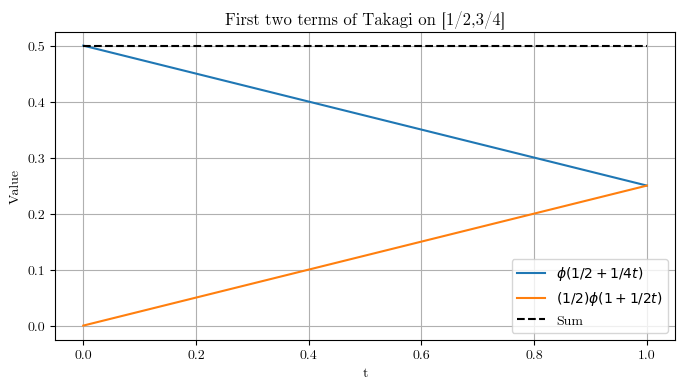

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Define the triangular function phi
def phi(x):
    return np.minimum(np.mod(x,1), 1-np.mod(x,1))

# t in [0,1] corresponds to x in [1/2, 3/4]
t = np.linspace(0, 1, 500)
x = 1/2 + 1/4 * t

# Compute the two terms separately
term1 = phi(1/2 + 1/4 * t)
term2 = 1/2 * phi(1 + 1/2 * t)
total = term1 + term2

# Plot
plt.figure(figsize=(8,4))
plt.plot(t, term1, label=r'$\phi(1/2 + 1/4 t)$')
plt.plot(t, term2, label=r'$(1/2)\phi(1 + 1/2 t)$')
plt.plot(t, total, 'k--', label='Sum')
plt.xlabel('t')
plt.ylabel('Value')
plt.title('First two terms of Takagi on [1/2,3/4]')
plt.legend()
plt.grid(True)
plt.show()



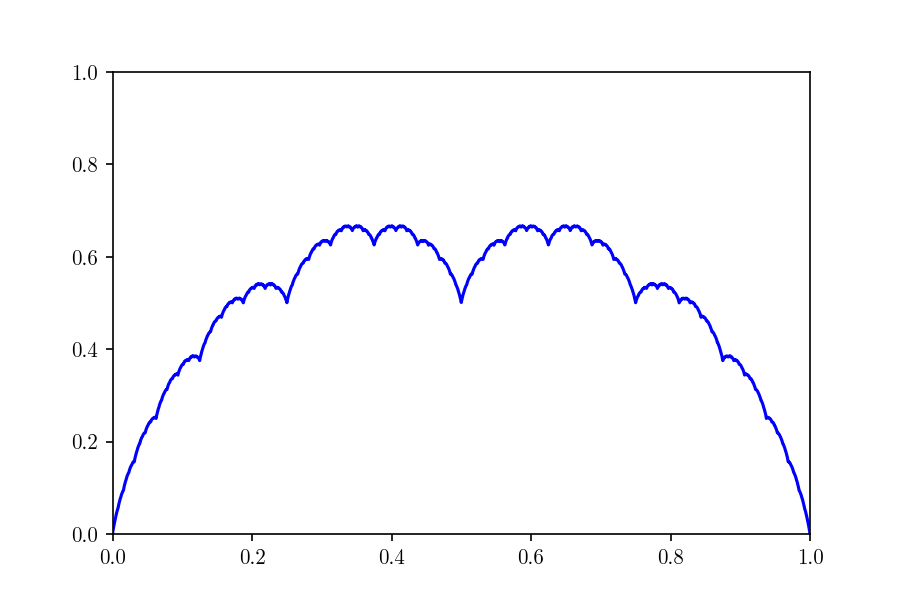

## The Takagi–Landsberg family: The first generalization

Once we have understood the classic Takagi function, a natural question arises: **can we create other functions with similar structure and properties**? In particular, can we construct functions that remain continuous everywhere but nowhere differentiable, while still exhibiting the same kind of self-similarity and fractal behavior?

A first and very natural generalization is obtained by **modifying the coefficients in the series**. Recall that the original Takagi function is defined as

$$
T(x) = \sum_{n=0}^{\infty} \frac{\phi(2^n x)}{2^n}, 
\qquad 
\phi(x) = \min(x, 1-x).
$$

Here the factor $1/2^n$ controls how quickly the terms decay. Suppose now that we replace $1/2^n$ with $1/2^{nH}$, where $H > 0$ is a real parameter:

$$
T_H(x) = \sum_{n=0}^{\infty} \frac{\phi(2^n x)}{2^{nH}}.
$$

This parameter \(H\) is known as the **Hurst parameter**.  

- For $H \in (0,1)$, the function becomes rougher: the smaller \(H\) is, the slower the coefficients decay, so fine-scale oscillations contribute more strongly, producing a very jagged graph.  
- At $H=1$, we recover the **classical Takagi function**.  
- For $H>1$, the coefficients decay more rapidly, meaning that high-frequency oscillations are heavily damped. The resulting function is smoother, and in fact for sufficiently large $H$ it is not only continuous but differentiable (and eventually analytic).  

Thus the Hurst parameter effectively interpolates between rough, fractal-like graphs ($H < 1$) and smoother, more classical curves ($H > 1$).


In [53]:
from ipywidgets import interact, FloatSlider
import numpy as np
import matplotlib.pyplot as plt

# Set CMU Serif font globally for matplotlib
plt.rcParams["font.family"] = "CMU Serif"

# triangle wave
def phi(x):
    return np.minimum(np.mod(x,1), 1-np.mod(x,1))

# generalized Takagi with Hurst parameter H
def takagi_H(x, H=1.0, n_terms=12):
    y = np.zeros_like(x)
    for n in range(n_terms):
        y += phi(2**n * x) / (2**(n*H))
    return y

# interactive plot
def plot_takagi(H=1.0):
    x = np.linspace(0,1,4000)
    y = takagi_H(x, H, n_terms=12)

    plt.figure(figsize=(7,4))
    plt.plot(x, y, color="blue")
    plt.title(f"Takagi Function with Hurst Parameter H = {H:.2f}")
    plt.ylim(0, 2)   # fixed y-range
    plt.grid(True, alpha=0.3)
    plt.show()

# Slider styled with CMU Serif
style = {'description_width': 'initial'}
slider = FloatSlider(
    min=0.1, max=2.0, step=0.05, value=1.0,
    description="Hurst Parameter (H):",
    style=style,
    readout=True,
    readout_format=".2f"
)

# Force slider font to CMU Serif via layout
slider.layout.width = '500px'

interact(plot_takagi, H=slider);


interactive(children=(FloatSlider(value=1.0, description='Hurst Parameter (H):', layout=Layout(width='500px'),…

Observe that the weight factor can be written as

$$
\frac{1}{2^{nH}} = (2^H)^{-n}.
$$

This shows that, instead of parameterizing by $H$, we can directly introduce a parameter

$$
w = 2^{-H}, \qquad \text{with } 0 < w < 1,
$$

and define the more general class

$$
T_w(x) = \sum_{n=0}^{\infty} w^n \, \phi(2^n x).
$$

This formulation has the advantage of decoupling the base of the exponential decay from the dyadic scaling in the argument. We've just defined the family of functions $T_{w \in [0, 1]}$, a generalization of the Takagi function.  

Different values of $w$ correspond to different “levels of roughness” or smoothness:  
- For $w = \tfrac{1}{2}$, we obtain the classical Takagi function.  
- For small $w$ (close to 0), the higher-order terms vanish rapidly, so $T_w(x)$ looks almost like a simple triangle function.  
- For larger $w$ (close to 1), the higher-order oscillations persist with significant weight, producing highly irregular, jagged graphs.  
- Remarkably, at special values of $w$, the function admits **closed-form expressions**. For example, when $w = \tfrac{1}{4}$, the infinite sum collapses into a simple quadratic, giving a **parabola**:

$$
T_{1/4}(x) = 2x(1-x).
$$

This construction of the parabola, by midpoint subdivision, was described by Archimedes.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

plt.rcParams["font.family"] = "CMU Serif"

# Triangle wave
def phi(x):
    return np.minimum(np.mod(x,1), 1-np.mod(x,1))

# Generalized Takagi with weight w^n
def takagi_w(x, w=0.5, n_terms=15):
    y = np.zeros_like(x)
    for n in range(n_terms):
        y += (w**n) * phi(2**n * x)
    return y

# Plotting function
def plot_takagi(w=0.5):
    x = np.linspace(0,1,4000)
    y = takagi_w(x, w, n_terms=15)
    
    plt.figure(figsize=(7,4))
    plt.plot(x, y, lw=1.5, color="navy")
    plt.title(f"Takagi function with w = {w:.2f}")
    plt.grid(True, alpha=0.3)
    
    # highlight the parabola case (allowing tolerance)
    if abs(w - 0.25) < 1e-3:
        plt.plot(x, 2*x*(1-x), 'r--', lw=2, label=r"$2x(1-x)$")
        plt.legend()
    
    plt.show()

# Interactive slider
interact(plot_takagi, 
         w=FloatSlider(min=0.1, max=0.9, step=0.05, value=0.5,
                       description="w:", readout_format=".2f"));


interactive(children=(FloatSlider(value=0.5, description='w:', max=0.9, min=0.1, step=0.05), Output()), _dom_c…

But we can take this further:

## The Takagi Class

So far we've been exploring Takagi-like functions with **geometric decay**: $w^n$ coefficients. This makes the series neat, self-similar, and easy to visualize. But it's natural to ask: what if we **relax this restriction**?

Let's consider a sequence of weights ${\mathbf{w}} = (w_n)_{n\ge 0}$ satisfying:

1. $w_n \to 0$ as $n \to \infty$ (to ensure convergence),
2. $\sum_{n=0}^\infty w_n < \infty$ (so the series converges uniformly).

Then we can define a **generalized Takagi function** as

$$
T_{\mathbf{w}}(x) = \sum_{n=0}^{\infty} w_n \, \phi(2^n x),
\qquad \phi(x) = \min(x,1-x).
$$

By allowing **arbitrary sequences $(w_n)$ that decay sufficiently fast**, we enter the **full Takagi class**.  

Some important points:

- The classical Takagi function corresponds to $w_n = 2^{-n}$.  
- The Hurst/Takagi–Landsberg family corresponds to $w_n = 2^{-nH}$, a geometric sequence.  
- For a general sequence $(w_n)$, the function $T_{\mathbf{w}}$ remains **continuous**, and often **nowhere differentiable**, but the exact **self-similarity** may disappear.  
- By choosing different sequences $(w_n)$, we can control the "roughness" of the function at different scales in very flexible ways.  

Let's visualize three simple weight sequences that match our criteria. Notice how, despite their different appearance, they all share their continuity, non-differentiability and fractal properties (for some parameters):


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown

plt.rcParams["font.family"] = "CMU Serif"

# Triangle wave
def phi(x):
    return np.minimum(np.mod(x,1), 1-np.mod(x,1))

# Generalized Takagi with arbitrary sequence
def takagi_general(x, decay_type="w^n", param=0.5, n_terms=25):
    y = np.zeros_like(x)
    
    if decay_type == "w^n":
        w_n = param ** np.arange(n_terms)           # w^n
        seq_text = r"$w_n = w^n$"
    elif decay_type == "n^-w":
        w_n = 1 / ((np.arange(n_terms)+1) ** param)  # 1/n^w
        seq_text = r"$w_n = 1/n^w$"
    elif decay_type == "(-1)^n w^n":
        w_n = ((-1)**np.arange(n_terms)) * (param ** np.arange(n_terms))  # alternating sign
        seq_text = r"$w_n = (-1)^n w^n$"
    else:
        raise ValueError("Unknown decay type")
    
    for n in range(n_terms):
        y += w_n[n] * phi(2**n * x)
    return y, seq_text

# Plotting function
def plot_takagi_class(decay_type="w^n", param=0.5):
    x = np.linspace(0,1,4000)
    y, seq_text = takagi_general(x, decay_type, param, n_terms=25)
    
    plt.figure(figsize=(7,4))
    plt.plot(x, y, lw=1.5, color="navy")
    plt.title(f"Takagi Class: {decay_type}, param = {param:.2f}")
    plt.xlabel("x")
    plt.ylabel("T(x)")
    plt.grid(True, alpha=0.3)
    
    # Add LaTeX text in the top-right corner
    plt.text(0.98, 0.95, seq_text, transform=plt.gca().transAxes,
             ha='right', va='top', fontsize=12, color='darkred')
    
    plt.show()

# Interactive widget
interact(plot_takagi_class,
         decay_type=Dropdown(
             options=["w^n","n^-w","(-1)^n w^n"],
             value="w^n",
             description="Decay:"
         ),
         param=FloatSlider(
             min=0.1, max=1.5, step=0.05, value=0.5,
             description="Param:", readout_format=".2f"
         )
        );


interactive(children=(Dropdown(description='Decay:', options=('w^n', 'n^-w', '(-1)^n w^n'), value='w^n'), Floa…

### Properties of Takagi Class Functions Depending on the Sequence $w_n$

So far, we have explored visually how the sequence $(w_n)$ shapes the "roughness" of the generalized Takagi function $T_{\mathbf{w}}(x)$. We can now state the main differentiability properties in a simpler, more intuitive way.

Let us consider the normalized sequence $w_n 2^n$, which essentially measures the contribution of each level in the series. Then, according to **N. Kôno (1987)**:

1. **Nowhere differentiable:**  
   $T_{\mathbf{w}}$ is **nowhere differentiable** if and only if  
   $$
   \lim_{n\to\infty}{w_n}{2^n} \neq 0,
   $$  
   i.e., the terms do not decay to zero. ($2^{-n}$ shrinks faster than $w_n$)

2. **Differentiable on a null set but full derivative range:**  
   $T_{\mathbf{w}}$ is **nondifferentiable almost everywhere**, but differentiable on an **uncountable null set**, and the **range of its derivative** is $\mathbb{R}$, if and only if  
   $$
   \lim_{n\to\infty} {w_n}{2^n} = 0 \quad \text{but} \quad \sum_n \left({w_n}{2^n}\right)^2 = \infty.
   $$  

3. **Absolutely continuous:**  
   $T_{\mathbf{w}}$ is **absolutely continuous**, and consequently differentiable almost everywhere, if and only if  
   $$
   \sum_n \left({w_n}{2^n}\right)^2 < \infty.
   $$  

**Intuition:**

- If the normalized terms **do not vanish**, the function is too "jagged" — nowhere differentiable.  
- If they **vanish slowly**, the function is almost nowhere differentiable, but its derivative still takes all values on a sparse, uncountable set.  
- If they **vanish quickly enough** (square-summable), the function is smooth enough to be differentiable almost everywhere.

In essence, the **decay rate of $w_n2^n$** dictates the fractal roughness and differentiability behavior of the Takagi class function.

## From dyadic tents to arbitrary point-clouds: a more intuitive take on the Ferrera–Gómez generalization

### The Generalized Takagi Function

Let's pause for a moment and look at the Takagi summand $\phi(2^n x) / 2^n $ in a slightly different way. Instead of thinking of it as "the distance from $2^n x$ to the nearest integer," we can equivalently view it as a function measuring **the distance from $x$ to a set of points** 
$$
D_n^{\mathrm{dyadic}} = \left\{\frac{k}{2^n} : k = 0,1,\dots, 2^n\right\},
$$ which is a subset of $[0,1]$ called the **dyadic net at scale $2^{-n}$**. In other words, $\phi(2^n x) / 2^n$ is the distance from $x$ to the nearest point in $D_n^{\mathrm{dyadic}}$:
$$
\frac{\phi(2^n x)}{2^n} = g_n^{\mathrm{dyadic}}(x)=\operatorname{dist}(x,D_n^{\mathrm{dyadic}}).
$$

Thinking about it this way makes the geometry a lot clearer: for a given $n$, the function $g_n(x) = \varphi(2^n x)$ is essentially constructing **triangular bumps** between the points of $D_n^{\mathrm{dyadic}}$. Each bump peaks at the midpoint of the gap between two consecutive points and drops linearly to zero at the endpoints. Stack these tents on top of each other across scales, and you see exactly the jagged, self-similar shape of the classical Takagi function emerge.

Now, it's natural to ask the following question: 

> What'd happen if we kept the same mechanic — stacking tents at finer and finer scales — but replaced the dyadic net $D_n^{\mathrm{dyadic}}$ with some other sets of points?  

Could we still get a continuous, nowhere differentiable function? Could we vary the shape and spacing of the bumps, yet retain the same multiscale structure that makes Takagi functions so fractal?

This is precisely the idea behind the **Ferrera–Gómez generalisation**. They realised that the key ingredient in the classical construction is **not the dyadic grid itself**, but rather:

1. Each level $n$ corresponds to a **finite set of points $D_n$ in $[0,1]$**.  
2. The points in $D_n$ are sufficiently dense, and the spacing between consecutive points is controlled (not too small, not too large, relative to a scale $\alpha_n$).  
3. The tents (distance functions to $D_n$) are stacked across scales, with the "heights" naturally decreasing as $n$ increases, forming the series $\sum g_n(x)$.

More precisely, when we define $\mathcal{D} = (D_n)_n$ as an increasing ($D_0 ⊆ D_1 ⊆ \dots$) sequence of finite sets that fulfill the following properties:

1. $0, 1 \in D_0$ (and thus in every subsequent set $D_n, n > 0$).

2. $D = \bigcup\limits_{n=0}^{\infty} D_n$ is a **dense** and **countable** subset of $[0,1]$ (the union of all $D_n$ sets eventually "fills out" $[0,1]$, so that, for any arbitrary point $p$ in $[0,1]$ and for any arbitrarily small number $\epsilon > 0$, you can find a point $p_\epsilon$ in $D$ (and thus in a $D_n$ for a certain $n \in \mathbb{N}$) such that the distance between $p$ and $p_\epsilon$ is smaller than $\epsilon$).


3. $\rho\in(0,1]$ and a non-increasing sequence $\alpha_n\downarrow0$ such that whenever $x,y\in D_n$ are consecutive points of $D_n$ (i.e. $(x,y)\cap D_n=\varnothing$), we have $ρα_n ≤ |x − y| ≤ α_n$. (The distances between consecutive points in $D_n$ fall between a range of values $[ρα_n, α_n]$ that become smaller as n increases. This way, the spacing between consecutive points is controlled and the sets $D_n$ become denser as $n$ increases).

Ferrera and Gómez proved the following:


> For any such decomposition $(D_n)_n$ the function
> $$
T_D(x)=\sum_{n=0}^\infty \operatorname{dist}(x,D_n)
$$
> is continuous on $[0,1]$ and is nowhere differentiable.


*(Interestingly, it can be proven that, for any dense and countable set $D \subset [0,1]$, we can find a sequence $(D_n)_n$ (a decomposition of $D$) such that the above conditions are met).*

Once you see it this way, a whole universe of generalized Takagi functions opens up: instead of the dyadic net, you can choose **any sequence of finite point sets $D_n$** satisfying suitable spacing conditions. The distance functions to these sets, summed across $n$, produce functions that are continuous, nowhere differentiable, and still retain that multiscale, tent-stacking geometry.

In short, the classical Takagi function is just the **special case where the finite sets are the dyadic nets**. Once you abstract to arbitrary point-clouds, you see that nowhere differentiability is a structural consequence of the multiscale tents, not of the dyadic numbers per se. And that is the essence of the Ferrera–Gómez generalisation: build your own "clouds of tents" at all scales, and you still get a continuous, nowhere differentiable function. Thus, we define the **Generalised Takagi Function** by
$$
T_D(x)=\sum_{n=0}^\infty g_n(x),\qquad g_n(x)=\operatorname{dist}(x,D_n).
$$

Where $(D_n)_n$ is a sequence of sets that fulfills the aforementioned conditions.

Intuitively: each $g_n(x)=\operatorname{dist}(x,D_n)$ is $1$-Lipschitz and, on each gap between consecutive points of $D_n$, looks exactly like a triangular tent: it rises linearly with slope $\pm1$ from one gap endpoint to the centre and falls symmetrically.

#### Why this is natural / intuition you can hold on to
- Each $g_n(x)=\operatorname{dist}(x,D_n)$ is $1$-Lipschitz and, on each gap between consecutive points of $D_n$, looks exactly like a triangular tent: it rises linearly with slope $\pm1$ from one gap endpoint to the centre and falls symmetrically. So a single $g_n$ already provides an $O(1)$ contribution to any difference quotient computed at steps comparable to the gap size.
- Because $\alpha_n\downarrow0$, these tents probe arbitrarily small scales. For any arbitrarily small step $h$ you can find a level $n$ with $\alpha_n\sim h$, and the tent at that scale contributes $O(1)$ to the difference quotient at $x$ for that step. Thus difference quotients fail to settle to a limit as $h\to0$.
- The uniform factor $\rho$ prevents pathological choices of $D_n$ that would collapse all “useful” gaps and thus avoid producing persistent slope contributions. In short: the hypotheses guarantee *uniformly present* tents at every small scale.

So: **what'd happen if** we relaxed the spacing condition? We might be able to construct a decomposition where gaps shrink in a wildly non-uniform way so that many points see cancellations or no tents at certain scales, and the argument above could fail. That is why the two-sided spacing bound (with $\rho$) is the right minimal geometric hypothesis: it forces tents at every scale, uniformly distributed enough to break differentiability everywhere.


#### A sketch of the mechanism (slightly more precise)
1. Fix a point $x$ and an integer $n$ large enough so that $\alpha_n$ is very small. There is a nearby gap of size comparable to $\alpha_n$ (by the spacing condition).
2. Choose $h$ with $|h|\approx\alpha_n$. The $n$-th level tent $g_n$ changes by an amount comparable to $\alpha_n$ over a horizontal displacement of size $\alpha_n$, so the difference quotient $\frac{g_n(x+h)-g_n(x)}{h}$ is $O(1)$ (roughly $\pm 1$).
3. Other levels $m\ll n$ give smaller contributions at this scale, and levels $m\gg n$ are too fine to average out — but crucially, as $n\to\infty$ you can always find such scales. Hence the family of difference quotients does not converge as $h\to0$: no derivative at $x$.
4. Since $x$ was arbitrary and the spacing control is uniform, the same argument applies at every point: nowhere differentiable.


#### Why this is a meaningful generalisation
- It isolates the *geometric* heart of the Takagi phenomenon: **multiscale tents with uniformly comparable gaps** are enough to force nowhere differentiability. The dyadic grid is just a convenient, very regular example.
- Because any countable dense $D$ admits such a decomposition (see Proposition 1.5 in [6]), the construction is extremely flexible: you can build many exotic nowhere-differentiable functions by choosing $D$ and its decomposition.
- Practically, this viewpoint makes it easy to design numerical examples: pick a dense set (rationals, say), choose finite approximants $D_n$ respecting the spacing condition, plot $g_n$ and partial sums, and watch the tents accumulate.

#### Where to go next (suggestions for experiments)
- Compute and plot the first several $g_n$ and the partial sums $\sum_{k=0}^{N} g_k(x)$ for a concrete decomposition (e.g. $D=\mathbb Q\cap[0,1]$ with a greedy finite-approximation scheme).
- Animate how the tents at different scales stack and observe how difference quotients at decreasing $h$ jump around.
- Try relaxing the spacing condition numerically to see how the obstruction to differentiability may fail if the nets $D_n$ are too degenerate.

**Reference.** Ferrera & Gómez Gil, *Generalized Takagi functions via point-cloud decompositions* (see [6] in the bibliography) — in particular Proposition 1.5 guarantees admissible decompositions for every countable dense set $D$.

### The Generalized Takagi Class

Following the same reasoning as M. Hata and M. Yamaguti, Ferrera and Gómez Gil introduced a **Generalized Takagi class** of functions. Combining the ideas of their Generalized Takagi Function, with its set decompositions, and the previously explored weight sequences, we can define the Generalized Takagi class as follows:

Let $\mathcal{D} = (D_n)_{n\ge 0}$ be a decomposition of a countable dense set $D\subset[0,1]$ that fulfills the aforementioned criteria.  

For a **sequence of weights** $w = (w_n)_{n\ge 0}$ satisfying $\sum_{n=0}^\infty (w_n \alpha_n)_n  < \infty$, the **Generalized Takagi function** associated to $\mathcal{D}$ and $w$ is defined by

$$
T_{D,w}(x) = \sum_{n=0}^{\infty} w_n\, g_n(x), \qquad g_n(x) = \operatorname{dist}(x,D_n).
$$

Under some mild extra conditions on the decomposition, the **Generalized Takagi Class** forms a closed subspace of $C[0,1]$, isomorphic to $\ell^1$.  

#### A concrete interesting case — the Takagi-Van der Waerden class

One particularly interesting instance occurs as follows:

1. Let $r=(r_n)_{n\ge 0}$ be a strictly increasing sequence of non-negative integers such that $r_0=1$ and $r_n$ divides $r_{n+1}$ for all $n$.  
2. Define the decomposition $D = (D_n)$ of the set $D = \bigcup_n D_n$ by
$$
D_n = \left\{\frac{k}{r_n} : k = 0, \dots, r_n\right\}.
$$
3. Take $\alpha_n = 1/r_n$ and $\rho = 1$.

The corresponding class is called the **Generalized Takagi-Van der Waerden class**. For the special choice $w_n = 1$ and $r_n = r^n$ with $r \ge 2$, we recover the **classical Takagi-Van der Waerden function**.

- These functions can have **infinite derivatives at certain points**, as characterized in [9].  
- The **approximate differentiability** of functions in this class has been studied in [11].

#### Why this generalisation makes sense

- The classical Takagi function corresponds to a very regular dyadic net $D_n = \{k/2^n\}$ and equal weights $w_n = 1/2^n$.  
- In the generalized class, we allow both **flexible point sets $D_n$** (still increasingly dense with controlled spacing) and **flexible weights $w_n$**, while keeping the multiscale “stacking tents” intuition.  
- The continuity and fractal behavior of the classical Takagi function survive, but now we can explore a **much larger family of functions**, including exotic examples with tailored differentiability or fractal properties.
